In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('EV_Population.csv')

In [20]:
df.head

<bound method NDFrame.head of       State  Model Year       Make Electric Vehicle Type  Electric Range  \
0        WA        2020      TESLA                   BEV             266   
1        WA        2024        BMW                  PHEV              39   
2        WA        2024        BMW                  PHEV              39   
3        WA        2018      TESLA                   BEV             215   
4        WA        2012  CHEVROLET                  PHEV              35   
...     ...         ...        ...                   ...             ...   
92671    WA        2015     NISSAN                   BEV              84   
92672    WA        2018      TESLA                   BEV             215   
92673    WA        2019      TESLA                   BEV             220   
92674    WA        2022   CHRYSLER                  PHEV              32   
92675    WA        2018      TESLA                   BEV             215   

       Base MSRP  Legislative District CAFV Eligibility S

In [21]:
df.describe()

,Model Year,Electric Range,Base MSRP,Legislative District
count,92676.00000,92676.000000,92676.000000,92676.000000
mean,2018.91494,115.509388,2018.564461,28.506798
std,3.27711,98.815377,11390.579691,14.649595
min,1999.00000,6.000000,0.000000,1.000000
25%,2017.00000,30.000000,0.000000,17.000000
50%,2019.00000,73.000000,0.000000,32.000000
75%,2021.00000,215.000000,0.000000,41.000000
max,2025.00000,337.000000,845000.000000,49.000000


In [22]:
df

,State,Model Year,Make,Electric Vehicle Type,Electric Range,Base MSRP,Legislative District,CAFV Eligibility Simple
0,WA,2020,TESLA,BEV,266,0,46.0,Eligible
1,WA,2024,BMW,PHEV,39,0,46.0,Eligible
2,WA,2024,BMW,PHEV,39,0,43.0,Eligible
3,WA,2018,TESLA,BEV,215,0,1.0,Eligible
4,WA,2012,CHEVROLET,PHEV,35,0,35.0,Eligible
...,...,...,...,...,...,...,...,...
92671,WA,2015,NISSAN,BEV,84,0,30.0,Eligible
92672,WA,2018,TESLA,BEV,215,0,1.0,Eligible
92673,WA,2019,TESLA,BEV,220,0,44.0,Eligible
92674,WA,2022,CHRYSLER,PHEV,32,0,45.0,Eligible


In [23]:
df.nunique

<bound method DataFrame.nunique of       State  Model Year       Make Electric Vehicle Type  Electric Range  \
0        WA        2020      TESLA                   BEV             266   
1        WA        2024        BMW                  PHEV              39   
2        WA        2024        BMW                  PHEV              39   
3        WA        2018      TESLA                   BEV             215   
4        WA        2012  CHEVROLET                  PHEV              35   
...     ...         ...        ...                   ...             ...   
92671    WA        2015     NISSAN                   BEV              84   
92672    WA        2018      TESLA                   BEV             215   
92673    WA        2019      TESLA                   BEV             220   
92674    WA        2022   CHRYSLER                  PHEV              32   
92675    WA        2018      TESLA                   BEV             215   

       Base MSRP  Legislative District CAFV Eligibil

In [24]:
df=df.drop(['State'],axis=1)

In [25]:
df.shape

(92676, 7)

In [26]:
df.columns

Index(['Model Year', 'Make', 'Electric Vehicle Type', 'Electric Range',
       'Base MSRP', 'Legislative District', 'CAFV Eligibility Simple'],
      dtype='object')

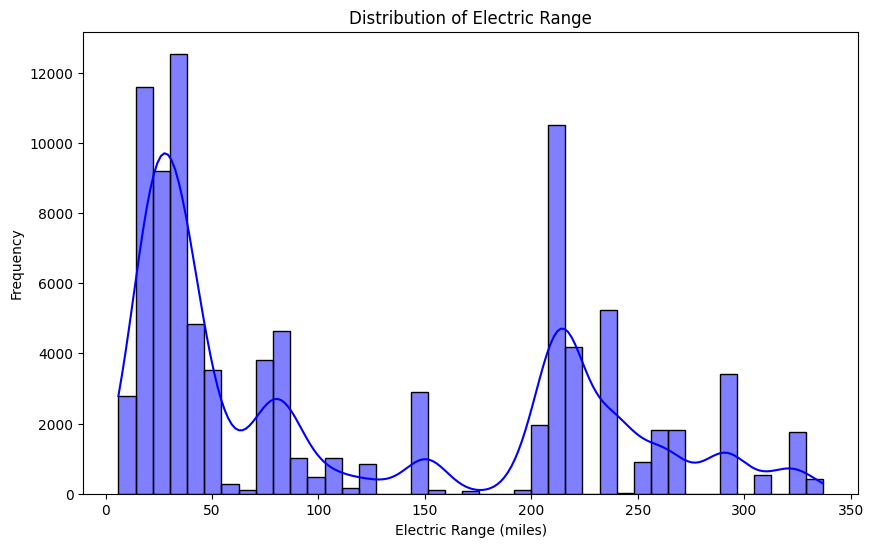

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn

plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], kde=True, color='blue')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_9836\921100245.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Electric Vehicle Type', data=df, palette='viridis')


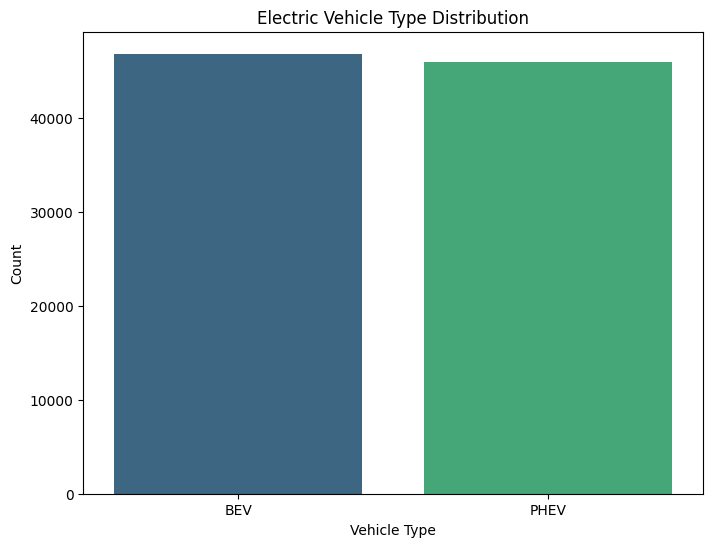

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Electric Vehicle Type', data=df, palette='viridis')
plt.title('Electric Vehicle Type Distribution')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_9836\296478019.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Model Year', data=df, palette='Set2')


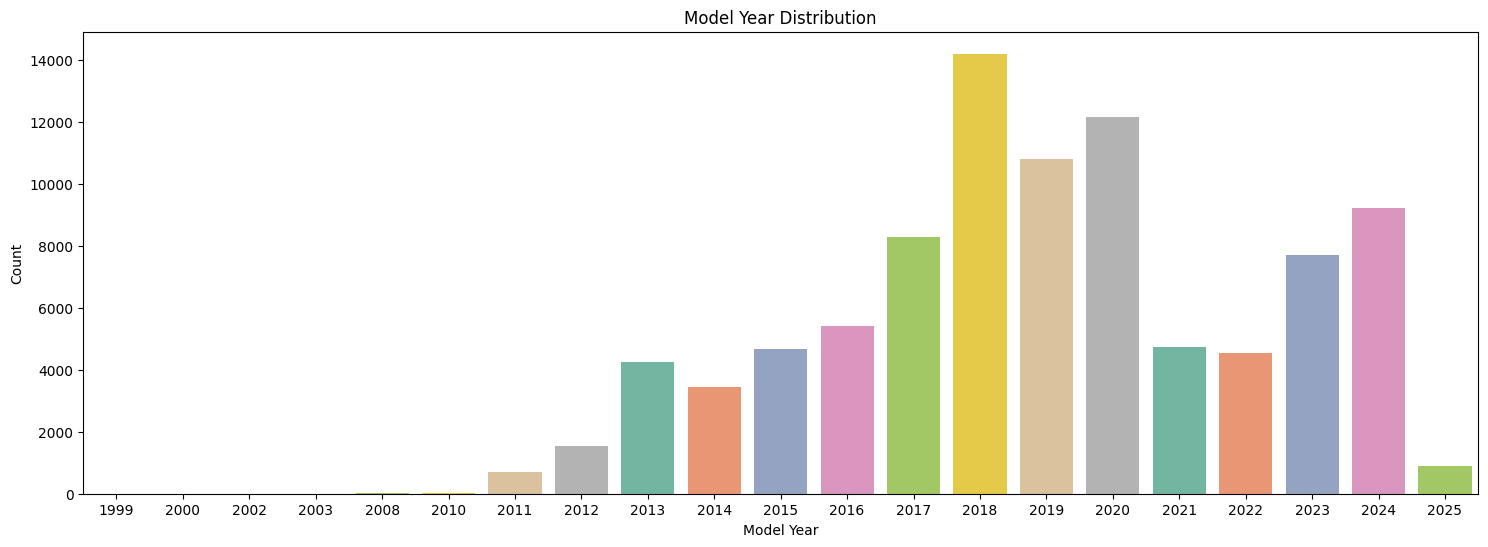

In [29]:
plt.figure(figsize=(18, 6))
sns.countplot(x='Model Year', data=df, palette='Set2')
plt.title('Model Year Distribution')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.show()

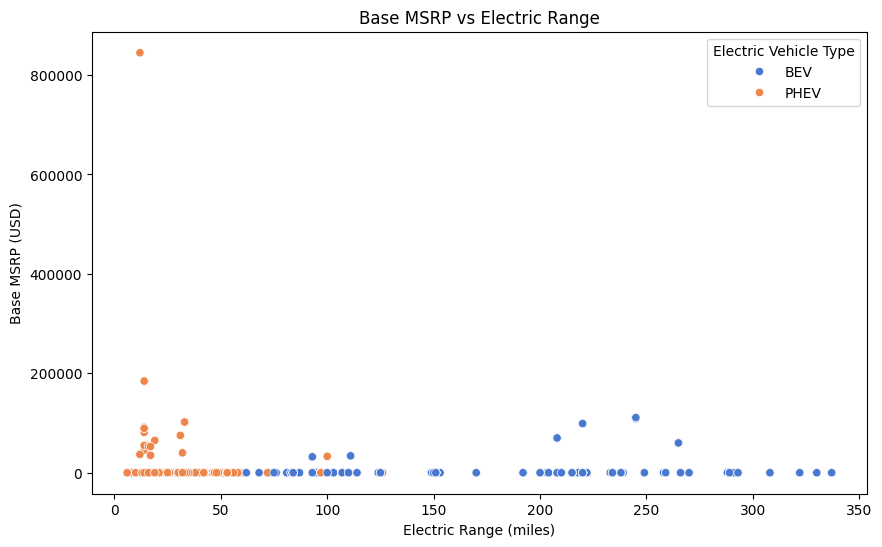

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Electric Range', y='Base MSRP', data=df, hue='Electric Vehicle Type', palette='muted')
plt.title('Base MSRP vs Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP (USD)')
plt.show()

In [31]:
X = df.drop('Electric Vehicle Type', axis=1)  
y = df['Electric Vehicle Type']

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [35]:
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

In [36]:
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
}

In [37]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [39]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [40]:
for name, clf in classifiers:
    # Cross-validation score
    cv_score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset (replace with your own dataset)
data = pd.read_csv("EV_Population.csv")  # Replace with the path to your dataset

# Ensure all categorical columns are encoded
categorical_columns = data.select_dtypes(include=['object']).columns

# Encode categorical columns using LabelEncoder or OneHotEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store the label encoder for inverse transform if needed

# Assume the target column is 'Electric Vehicle Type' (adjust as needed)
X = data.drop('Electric Vehicle Type', axis=1)  # Features
y = data['Electric Vehicle Type']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers to evaluate
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('SVM', SVC(probability=True, random_state=42)),
]

# Check if the problem is binary or multi-class
is_binary = len(y.unique()) == 2  # Binary classification if only 2 unique values in target column

# Initialize results dictionary
results = {'Model': [], 'Accuracy': [], 'Precision': []}

# Evaluate the models
for name, clf in classifiers:
    # Cross-validation score
    cv_score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation score for {name}: {cv_score.mean():.4f}")
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Calculate ROC AUC score for multi-class (One-vs-Rest)
    if not is_binary:  # Only compute ROC AUC for multi-class problems
        lb = LabelBinarizer()
        lb.fit(y)
        y_test_bin = lb.transform(y_test)
        y_pred_prob = clf.predict_proba(X_test)
        # Optionally, calculate ROC AUC score here for multi-class

    # Store results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


Cross-validation score for Random Forest: 0.9998
Cross-validation score for Logistic Regression: 0.9828
Cross-validation score for SVM: 0.8908
                 Model  Accuracy  Precision
0        Random Forest  0.999892   0.999892
1  Logistic Regression  0.981711   0.981728
2                  SVM  0.888703   0.905691


In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming `df` is your dataset
# Replace 'features' and 'target' with your actual column names

# Encode categorical variables in features
categorical_columns = X.select_dtypes(include=['object']).columns  # Select columns with strings
X[categorical_columns] = X[categorical_columns].apply(LabelEncoder().fit_transform)

# Encode target variable (if needed)
y = LabelEncoder().fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
print("Accuracy:", accuracy)
print("Precision:", precision)

# Detailed performance report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9284
           1       1.00      1.00      1.00      9252

    accuracy                           1.00     18536
   macro avg       1.00      1.00      1.00     18536
weighted avg       1.00      1.00      1.00     18536


Confusion Matrix:
 [[9284    0]
 [   0 9252]]


In [43]:
# Predict on the test set
y_pred = gb_model.predict(X_test)

# Print predictions
print("Predicted Class Labels:", y_pred)

# If you want predictions alongside the actual values:
print("\nActual vs Predicted:")
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))


Predicted Class Labels: [0 0 1 ... 1 1 0]

Actual vs Predicted:
       Actual  Predicted
0           0          0
1           0          0
2           1          1
3           0          0
4           1          1
...       ...        ...
18531       1          1
18532       1          1
18533       1          1
18534       1          1
18535       0          0

[18536 rows x 2 columns]


In [44]:
import joblib

joblib.dump(gb_model, "model_lda.pk1")

['model_lda.pk1']